In [1]:
from sklearn.datasets._samples_generator import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import random
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd

In [2]:
random.seed(144)
n_cluster = random.randint(5, 20)
n_samples = random.randint(400, 800)
cluster_std = random.uniform(0.3, 0.7)

In [3]:
X, res = make_blobs(n_samples=n_samples, centers=n_cluster, cluster_std=cluster_std, random_state=42)

vediamo il generato

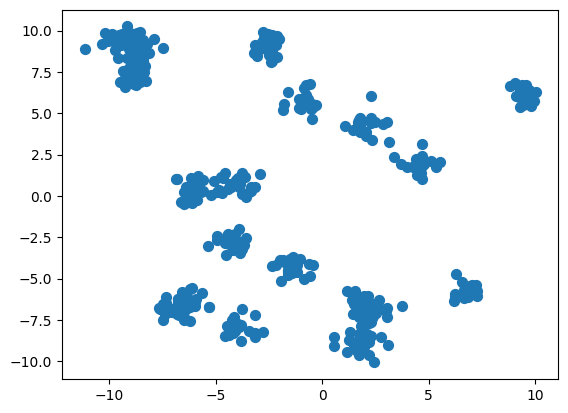

In [4]:
plt.scatter(X[:,0], X[:,1], s=50)

costruiamo la matrice di linkage

In [5]:
link_matrix = linkage(X, method="ward")

In [6]:
link_matrix

array([[1.35000000e+02, 3.92000000e+02, 1.37315652e-02, 2.00000000e+00],
       [4.90000000e+01, 6.60000000e+01, 2.01665563e-02, 2.00000000e+00],
       [2.51000000e+02, 3.93000000e+02, 2.08492857e-02, 2.00000000e+00],
       ...,
       [8.27000000e+02, 8.31000000e+02, 9.01139038e+01, 2.42000000e+02],
       [8.29000000e+02, 8.30000000e+02, 1.12110163e+02, 1.76000000e+02],
       [8.32000000e+02, 8.33000000e+02, 1.66744534e+02, 4.18000000e+02]],
      shape=(417, 4))

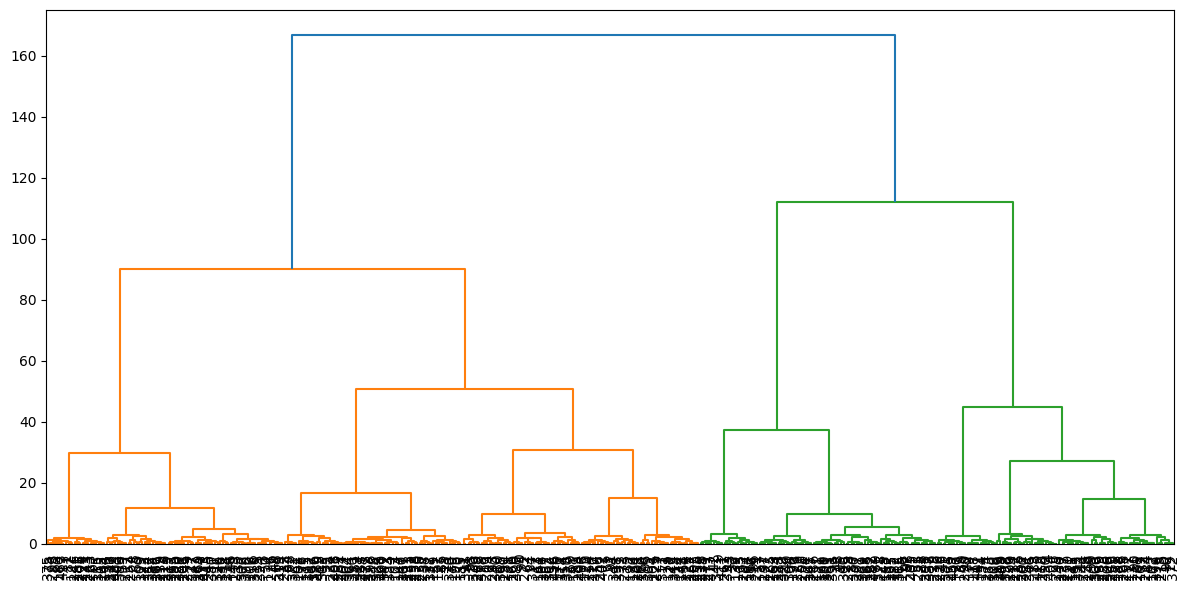

In [7]:
plt.figure(figsize=(12,6))
dendrogram(link_matrix)
plt.xticks(fontsize=10, rotation=90)
plt.tight_layout()
plt.show()

potrei inserire la soglia a 20

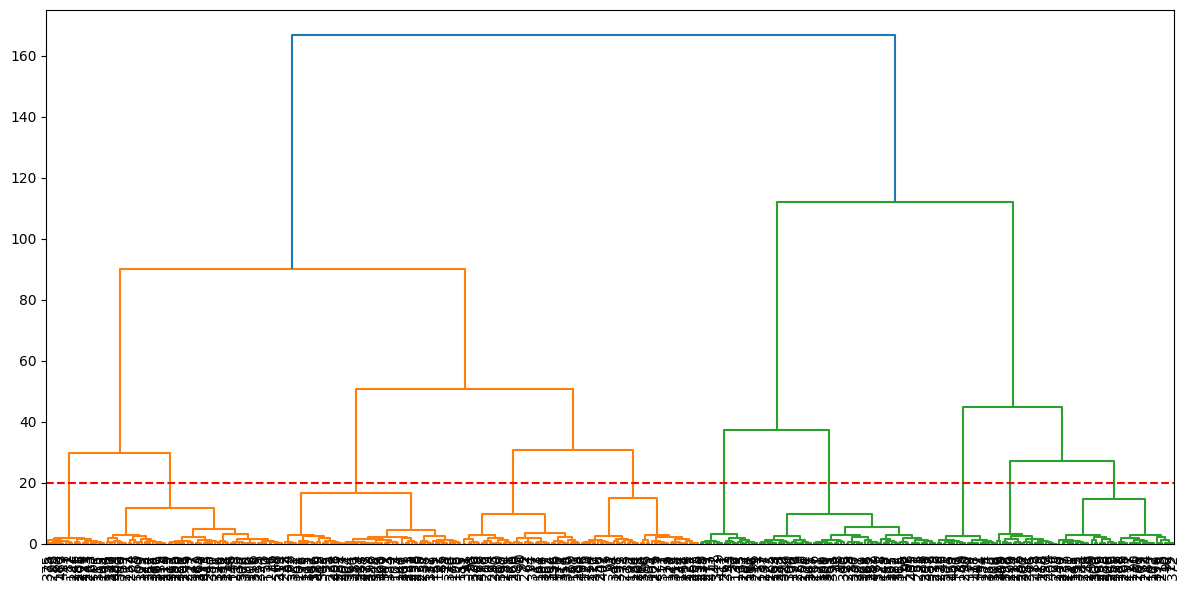

In [8]:
plt.figure(figsize=(12,6))
dendrogram(link_matrix)
plt.xticks(fontsize=10, rotation=90)
plt.axhline(y=20, color='red', linestyle='--', label='Soglia = 20')
plt.tight_layout()
plt.show()

conto quante linee taglia un cluster

In [9]:
clusters = fcluster(link_matrix, t=20, criterion='distance')
n_cluster = len(set(clusters))

print("Numero di cluster a soglia 20:", n_cluster)

Numero di cluster a soglia 20: 10


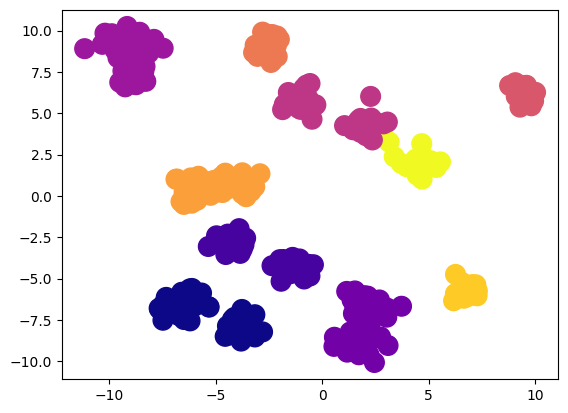

In [10]:
hc = AgglomerativeClustering(n_cluster)
y = hc.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y, s=200, cmap="plasma")

In [ ]:
def showTreshold(treshold, link_matrix):
  plt.figure(figsize=(12,6))
  dendrogram(link_matrix)
  plt.xticks(fontsize=10, rotation=90)
  plt.axhline(y=treshold, color='red', linestyle='--', label=f'Soglia = {treshold}')
  plt.tight_layout()
  plt.show()

In [12]:
def findTreshold(link_matrix):
  old_nr = [-1,-1]
  for i in range(1,50):
    clusters = fcluster(link_matrix, t=i, criterion='distance')
    n_cluster = len(set(clusters))
    
    if(n_cluster == old_nr[0] & n_cluster == old_nr[1]):
      showTreshold(i, link_matrix)
      return [i, n_cluster]
    
    old_nr = [old_nr[1], n_cluster]
  return 1


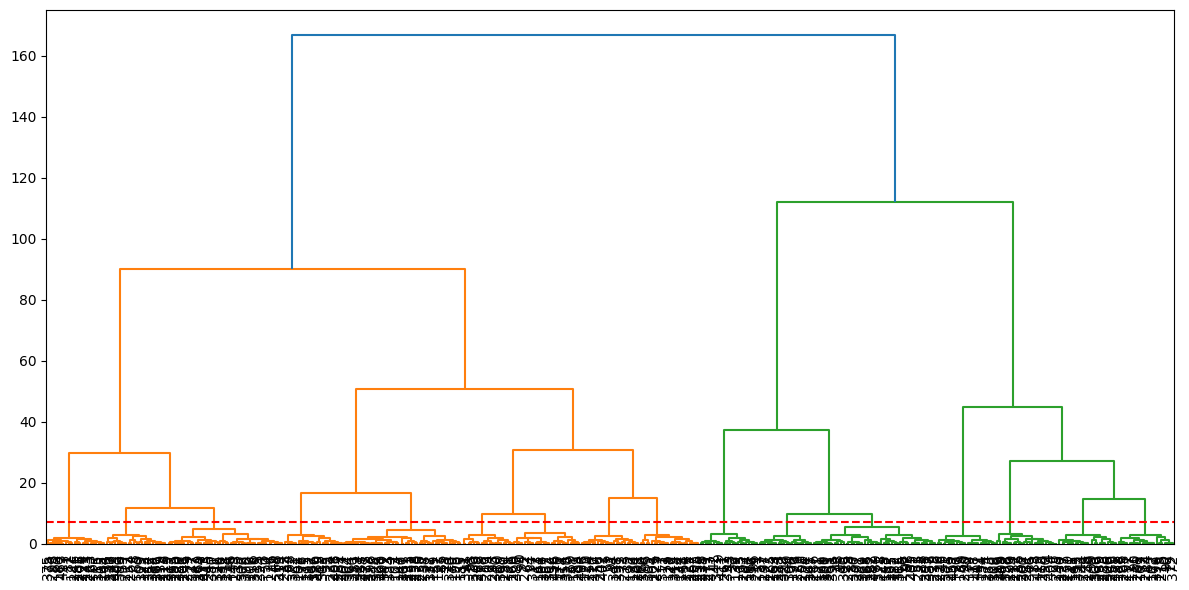

In [13]:
treshold, n_cluster = findTreshold(link_matrix)

In [14]:
print(treshold, n_cluster)

7 16


In [15]:
def estimate_centroids(data, linked, treshold):
  if isinstance(data, np.ndarray):
      data = pd.DataFrame(data, columns=[f"x{i+1}" for i in range(data.shape[1])])
  
  cluster_labels = fcluster(linked, t=treshold, criterion='distance')
  data['cluster'] = cluster_labels

  centroidi = data.groupby('cluster').mean(numeric_only=True)

  return centroidi

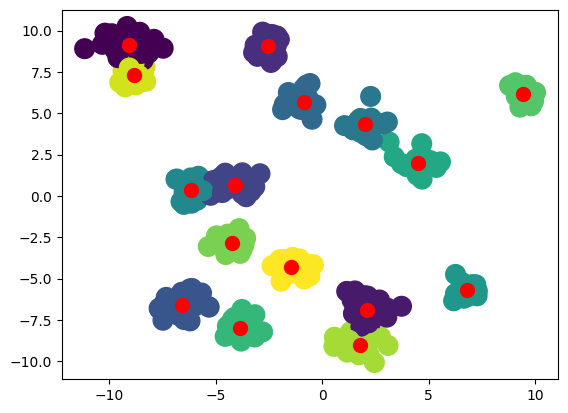

In [ ]:
centroids = estimate_centroids(X, link_matrix, treshold=treshold)

hc = AgglomerativeClustering(n_cluster)
y = hc.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y, s=200, cmap="viridis")
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c='red', marker='o', s=100, label='Centroidi stimati')
plt.show()